In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing



In [ ]:
house_df_main = pd.read_csv('housing.csv')
house_df = house_df_main.copy()

In [ ]:
house_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
house_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
house_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
house_df.fillna(house_df.mean(), inplace=True)

In [ ]:
house_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

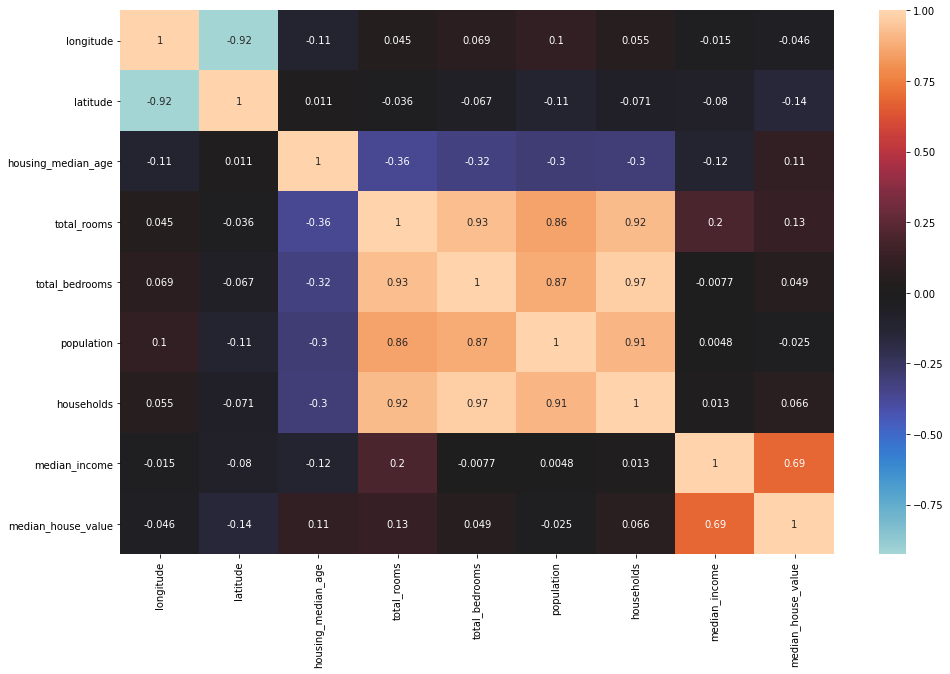

In [ ]:
#initial Correlation
plt.figure(figsize = (16,10))
sns.heatmap(house_df.corr(),annot=True,center=0 )

In [ ]:
dic = {}

##Worst Model

In [ ]:
wmhouse_df = house_df.copy()
wmhouse_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_bed'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
x = wmhouse_df[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = wmhouse_df.index)
wmhouse_df[column_names_to_normalize] = df_temp

In [ ]:
#worst model
wm_data = wmhouse_df.copy()
wmY = wm_data['median_house_value']
wm_data.drop(columns=['ocean_proximity','median_house_value'],inplace=True)
wmX_train, wmX_test, wmy_train, wmy_test = train_test_split(wm_data, wmY, test_size=0.2, random_state=1)
wm_data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'room_bed'],
      dtype='object')

In [ ]:
model = linear_model.LinearRegression()
model.fit(wmX_train, wmy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
wmy_pred = model.predict(wmX_test)

In [ ]:
MSE = metrics.mean_squared_error(wmy_test, wmy_pred)
RMSE = np.sqrt(metrics.mean_squared_error(wmy_test, wmy_pred))
scores = model.score(wmX_train, wmy_train)
dic['BaseModel'] = (RMSE,scores*100)
print(MSE,RMSE,scores*100)

4861902986.233204 69727.34747739372 63.99418722698588


##Exploring data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f085a759198>,
      dtype=object)

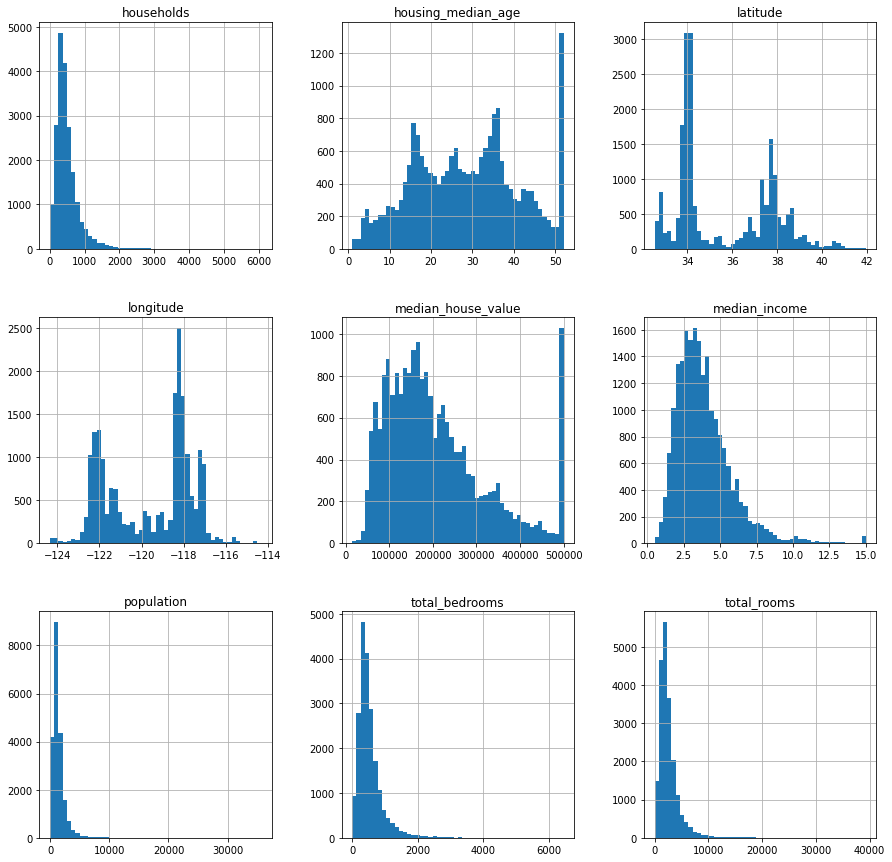

In [ ]:
house_df.hist(bins=50, figsize=(15, 15))

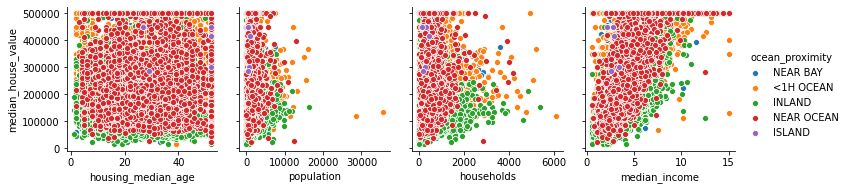

In [ ]:
sns.pairplot(house_df, x_vars=['housing_median_age', 'population', 'households', 'median_income'],y_vars ='median_house_value',hue = 'ocean_proximity')

In [ ]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

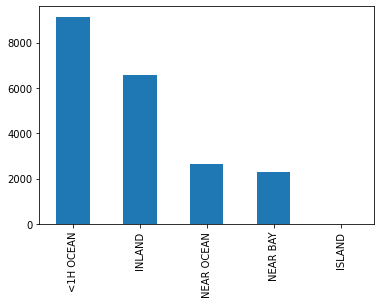

In [ ]:
house_df['ocean_proximity'].value_counts().plot(kind='bar')

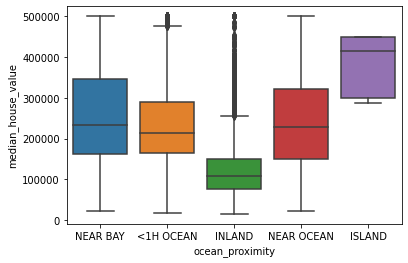

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=house_df)

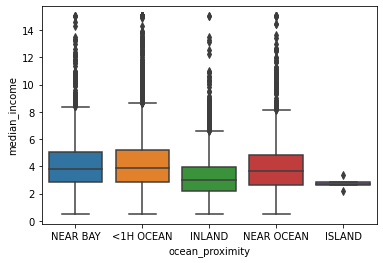

In [ ]:
sns.boxplot(x="ocean_proximity", y="median_income", data=house_df)

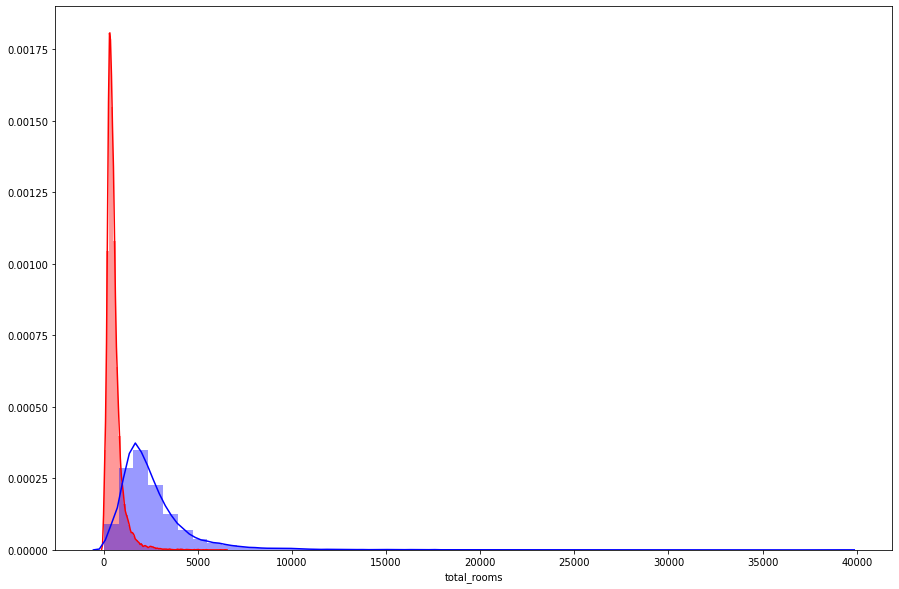

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(house_df['total_bedrooms'],color='red')
sns.distplot(house_df['total_rooms'],color='blue')
plt.show()

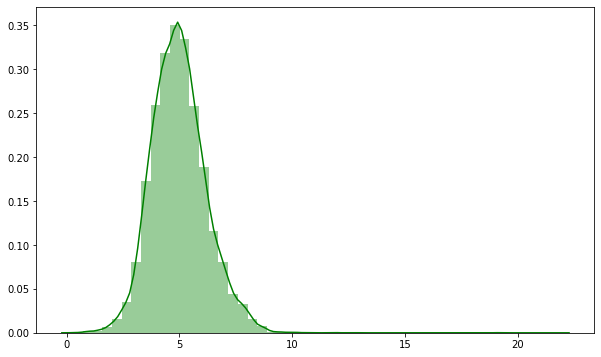

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot((house_df['total_rooms']/house_df['total_bedrooms']),color='green')
plt.show()

In [ ]:
house_df['room_bed'] = (house_df['total_rooms']/house_df['total_bedrooms'])

In [ ]:
house_df['room_bed']

0        6.821705
1        6.418626
2        7.721053
3        5.421277
4        5.810714
           ...   
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: room_bed, Length: 20640, dtype: float64

In [ ]:
house_df1 = house_df.copy()
house_df1 = house_df1.loc[ house_df1['room_bed']<10.0]

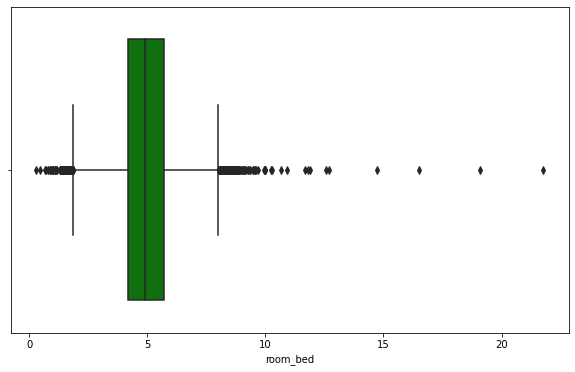

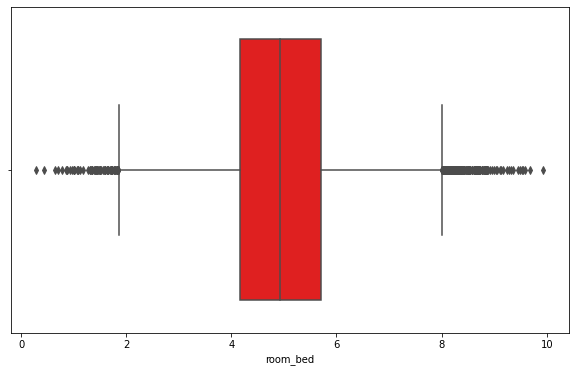

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(house_df['room_bed'],color='green',)

plt.figure(figsize=(10,6))
sns.boxplot(house_df1['room_bed'],color='red')

plt.show()

In [ ]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20623 non-null  float64
 1   latitude            20623 non-null  float64
 2   housing_median_age  20623 non-null  float64
 3   total_rooms         20623 non-null  float64
 4   total_bedrooms      20623 non-null  float64
 5   population          20623 non-null  float64
 6   households          20623 non-null  float64
 7   median_income       20623 non-null  float64
 8   median_house_value  20623 non-null  float64
 9   ocean_proximity     20623 non-null  object 
 10  room_bed            20623 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


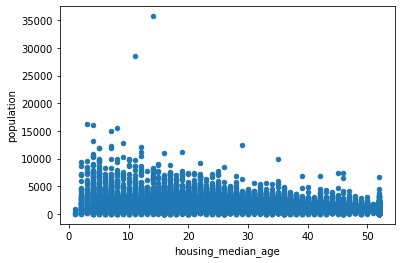

In [ ]:

house_df1.plot.scatter(x='housing_median_age', y='population')


In [ ]:
house_df1 = house_df1.loc[ house_df['population']<20000]

In [ ]:
house_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20621 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20621 non-null  float64
 1   latitude            20621 non-null  float64
 2   housing_median_age  20621 non-null  float64
 3   total_rooms         20621 non-null  float64
 4   total_bedrooms      20621 non-null  float64
 5   population          20621 non-null  float64
 6   households          20621 non-null  float64
 7   median_income       20621 non-null  float64
 8   median_house_value  20621 non-null  float64
 9   ocean_proximity     20621 non-null  object 
 10  room_bed            20621 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


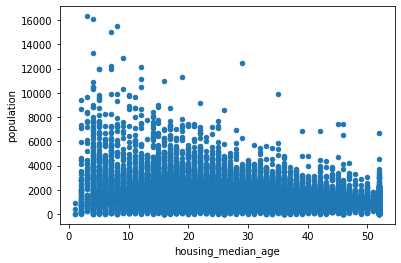

In [ ]:
house_df1.plot.scatter(x='housing_median_age', y='population')

In [ ]:
house_df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_bed'],
      dtype='object')

In [ ]:
house_df1['house_pop'] = house_df1['households'] / house_df1['population']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f085984c390>,
      dtype=object)

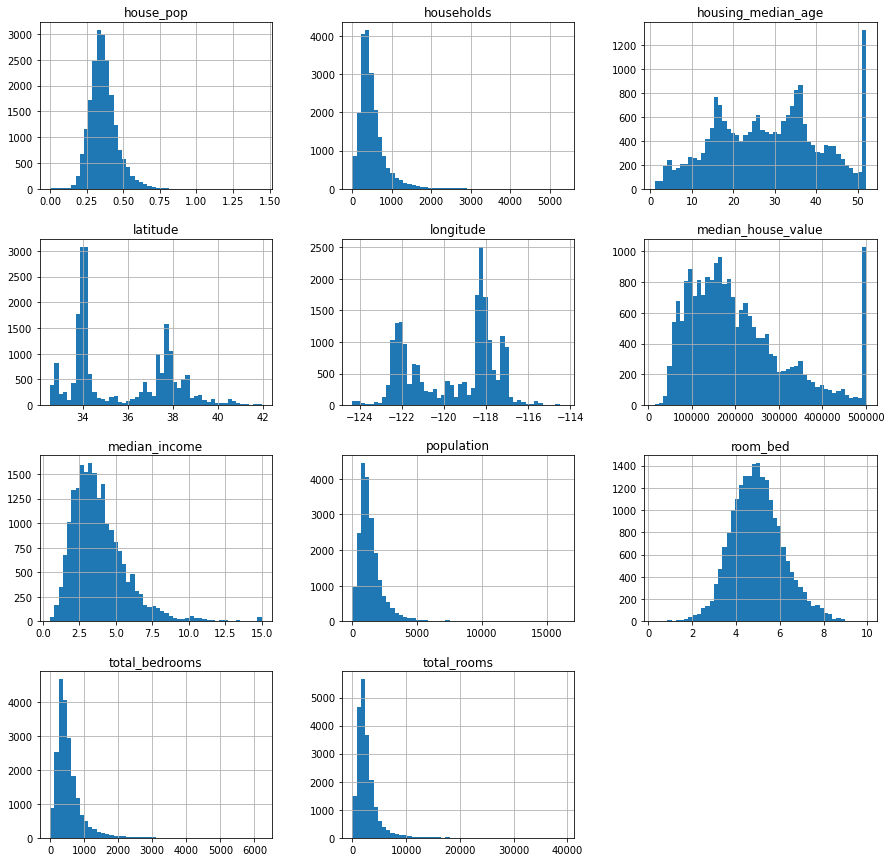

In [ ]:
house_df1.hist(bins=50, figsize=(15, 15))

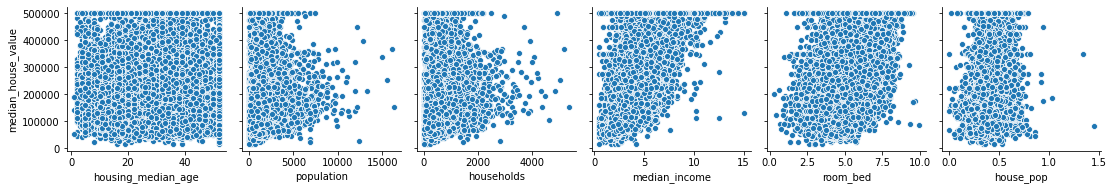

In [ ]:
sns.pairplot(house_df1, x_vars=['housing_median_age', 'population', 'households', 'median_income',
       'room_bed','house_pop'],y_vars ='median_house_value')

In [ ]:
house_df1 = pd.get_dummies(house_df1,columns=['ocean_proximity'])


In [ ]:
house_df1.columns
house_df1_norm = house_df1.copy()

In [ ]:
scaler = MinMaxScaler()
column_names_to_normalize = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_bed', 'house_pop']
x = house_df1_norm[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = house_df1_norm.index)
house_df1_norm[column_names_to_normalize] = df_temp

In [ ]:
house_df1_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bed,house_pop,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.020615,0.019568,0.023334,0.539668,0.902266,0.677432,0.270497,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.177967,0.147099,0.212246,0.538027,0.708247,0.635650,0.327758,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.030440,0.030242,0.032854,0.466028,0.695051,0.770655,0.246634,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.037687,0.034045,0.040694,0.354699,0.672783,0.532269,0.271306,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.044935,0.034474,0.048161,0.230776,0.674638,0.572637,0.316978,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0859841d30>,
      dtype=object)

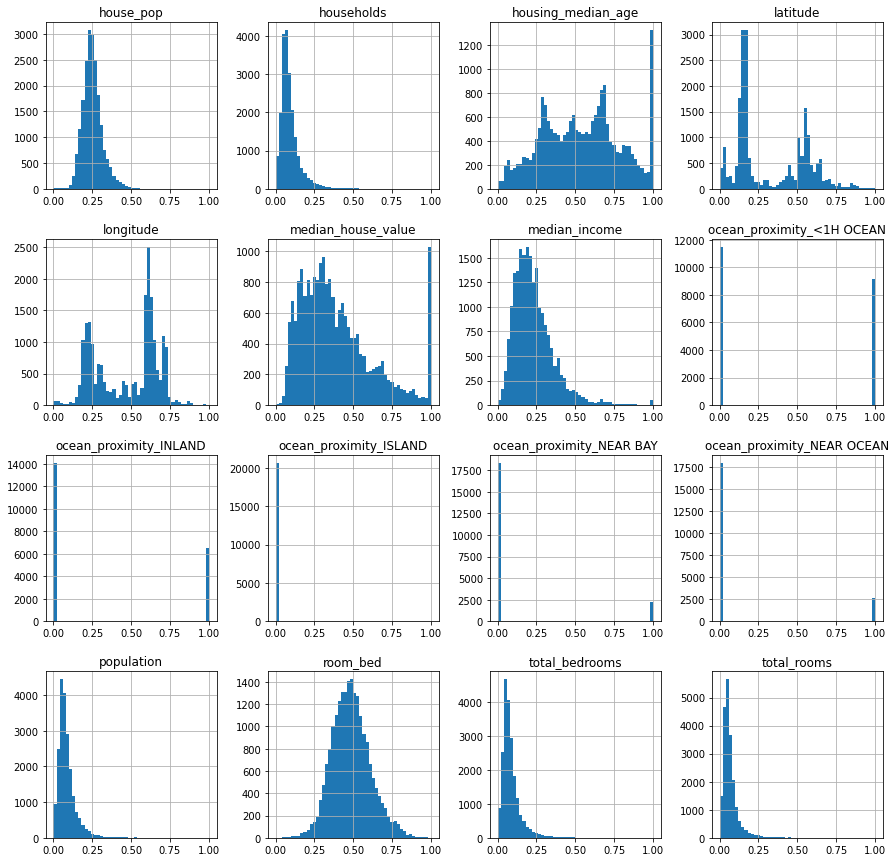

In [ ]:
house_df1_norm.hist(bins=50,figsize=(15, 15))

In [ ]:
#test model 1
m1_data = house_df1.copy()
m1Y = m1_data['median_house_value']
m2_data = house_df1.copy()
m2_data.drop(columns=['total_rooms',
       'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
m1_data.drop(columns=['median_house_value','total_rooms',
       'total_bedrooms','population','households','ocean_proximity_ISLAND'],inplace=True)
m1_data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'room_bed', 'house_pop', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
m1X_train, m1X_test, m1y_train, m1y_test = train_test_split(m1_data, m1Y, test_size=0.2,random_state=1)

In [ ]:
model1 = linear_model.LinearRegression()
model1.fit(m1X_train, m1y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m1y_pred = model1.predict(m1X_test)
# m1y_pred_train = model1.predict(m1X_train)

In [ ]:
print(metrics.mean_squared_error(m1y_test, m1y_pred))
print(np.sqrt(metrics.mean_squared_error(m1y_test, m1y_pred)))

0.017259916884954665
0.13137700287704338


In [ ]:
pd.DataFrame(zip(m1_data.columns,model1.coef_))

,0,1
0,longitude,-0.568254
1,latitude,-0.526368
2,housing_median_age,0.093002
3,median_income,1.205424
4,room_bed,-0.101540
5,house_pop,0.935819
6,ocean_proximity_<1H OCEAN,-0.344173
7,ocean_proximity_INLAND,-0.417423
8,ocean_proximity_NEAR BAY,-0.358715
9,ocean_proximity_NEAR OCEAN,-0.345990


In [ ]:
pd.DataFrame(zip(m1y_test,m1y_pred),columns=['True','Predicted'])

,True,Predicted
0,0.309073,0.380797
1,0.563917,0.587173
2,0.411959,0.426286
3,0.139795,0.261199
4,0.427217,0.210584
...,...,...
4120,1.000000,0.800433
4121,0.177527,0.212932
4122,0.303300,0.221287
4123,0.478351,0.232497


In [ ]:
model1.score(m1X_train, m1y_train)

0.6709017329127835

In [ ]:
m2_data.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity1', 'ocean_proximity_NEAR BAY': 'ocean_proximity2', 'ocean_proximity_NEAR OCEAN': 'ocean_proximity3'}, inplace=True)

In [ ]:
lm2 = smf.ols(formula='median_house_value ~ longitude + latitude + housing_median_age  + median_income + room_bed + house_pop + ocean_proximity1 + ocean_proximity_INLAND + ocean_proximity2 + ocean_proximity3', data=m2_data).fit()

In [ ]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     4233.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:14:58   Log-Likelihood:            -2.5811e+05
No. Observations:               20621   AIC:                         5.162e+05
Df Residuals:                   20610   BIC:                         5.163e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -2.2e+06   8.89e+04    -24.740      0.000   -2.37e+06   -2.03e+06
longitude              -2.717e+04    962.284    -28.235      0.000   -2.91e+04   -2.53e+04
latitude               -2.676e+04    951.967    -28.109      0.000   -2.86e+04   -2.49e+04
housing_median_age       872.9866     39.413     22.150      0.000     795.734     950.239
median_income           4.062e+04    420.362     96.630      0.000    3.98e+04    4.14e+04
room_bed               -5853.8827    653.238     -8.961      0.000   -7134.280   -4573.485
house_pop               3.094e+05   5177.073     59.770      0.000    2.99e+05     3.2e+05
ocean_proximity1       -1.417e+05   2.96e+04     -4.792      0.000      -2e+05   -8.37e+04
ocean_proximity_INLAND -1.775e+05   2.96e+04     -5.992      0.000   -2.36e+05   -1.19e+05
ocean_proximity2       -1.499e+05   2.96e+04     -5.065      0.000   -2.08e+05   -9.19e+04
ocean_proximity3       -1.439e+05   2.96e+04     -4.864      0.000   -2.02e+05   -8.59e+04
==============================================================================
Omnibus:                     3666.420   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12820.353
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       6.437   Cond. No.                     2.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## By using pipeline

###Decision Tree

In [ ]:
model_dt = make_pipeline(preprocessing.StandardScaler(),DecisionTreeRegressor(random_state=0))
scores = cross_val_score(model_dt, m1X_train, m1y_train, cv=10)
model_dt.fit(m1X_train, m1y_train)
pred = model_dt.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['DecisionTree'] = (RMSE,scores.mean() *100)

print(MSE,RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

4891442509.178182 69938.84835467469
Accuracy: 64.04 (+/- 0.05)


In [ ]:
dic

{'BaseModel': (69727.34747739372, 63.99418722698588),
 'DecisionTree': (69938.84835467469, 64.04078488475989),
 'LinearRegression': (63718.1091493718, 66.9870846251276)}

### Linear Regression

In [ ]:
model_lr = make_pipeline(preprocessing.StandardScaler(),linear_model.LinearRegression())
scores = cross_val_score(model_lr, m1X_train, m1y_train, cv=10)

model_lr.fit(m1X_train, m1y_train)
pred = model_lr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['LinearRegression'] = (RMSE,scores.mean() *100)

print(MSE,RMSE)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

4059997433.5712576 63718.1091493718
Accuracy: 66.99 (+/- 0.03)


#### Ridge Regression

In [ ]:
ridge_reg = linear_model.Ridge()
params_Ridge = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(m1X_train, m1y_train)
print(Ridge_GS.best_params_)
model_rr = make_pipeline(preprocessing.StandardScaler(),linear_model.Ridge(random_state=0, **Ridge_GS.best_params_))
scores = cross_val_score(model_rr, m1X_train, m1y_train, cv=10)

model_rr.fit(m1X_train, m1y_train)
pred = model_rr.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))


dic['RidgeRegression'] = (RMSE,scores.mean() *100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

{'alpha': 0.01, 'fit_intercept': True, 'solver': 'svd'}
Accuracy: 66.99 (+/- 0.03)


#### Lasso Regression

In [ ]:
lasso_reg = linear_model.Lasso()
params_Lasso = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20] , "fit_intercept": [True, False]}
Lasso_GS = GridSearchCV(lasso_reg, param_grid=params_Lasso, n_jobs=-1)
Lasso_GS.fit(m1X_train, m1y_train)
print(Lasso_GS.best_params_)
model_lasso = make_pipeline(preprocessing.StandardScaler(),linear_model.Lasso(random_state=0, **Lasso_GS.best_params_, max_iter=1e+5))
scores = cross_val_score(model_lasso, m1X_train, m1y_train, cv=10)

model_lasso.fit(m1X_train, m1y_train)
pred = model_lasso.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))


dic['LassoRegression'] = (RMSE,scores.mean() *100)
print(MSE,RMSE)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36609343230403.87, tolerance: 22238565871.289932
  positive)


{'alpha': 1e-15, 'fit_intercept': True}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32900524438573.746, tolerance: 19931128541.885597
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33036130981333.715, tolerance: 20018111434.507347
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32846007937623.33, tolerance: 19879225821.02224
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32934263

4059997433.571253 63718.109149371754
Accuracy: 66.99 (+/- 0.03)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36590850378517.05, tolerance: 22238565871.289932
  positive)


### Random Forest

In [ ]:
model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=2, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)
model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_2'] = (RMSE,scores.mean() *100)
print("Depth:2 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=5, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)


model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_5'] = (RMSE,scores.mean() *100)

print("Depth:5 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=10, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_10'] = (RMSE,scores.mean() *100)

print("Depth:10 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=20, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_20'] = (RMSE,scores.mean() *100)

print("Depth:20 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(max_depth=50, random_state=0))
scores = cross_val_score(model_rf, m1X_train, m1y_train, cv=10)

model_rf.fit(m1X_train, m1y_train)
pred = model_rf.predict(m1X_test)

MSE = metrics.mean_squared_error(m1y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(m1y_test, pred))

dic['RFD_50'] = (RMSE,scores.mean() *100)

print("Depth:50 Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))


Depth:2 Accuracy: 50.19 (+/- 0.05)
Depth:5 Accuracy: 69.29 (+/- 0.04)
Depth:10 Accuracy: 79.21 (+/- 0.03)
Depth:20 Accuracy: 81.59 (+/- 0.02)
Depth:50 Accuracy: 81.65 (+/- 0.02)


In [ ]:
test = model_rf.fit(m1X_train, m1y_train)

In [ ]:
pred = test.predict(m1X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(m1y_test, pred)))

0.10175224497475224


In [ ]:
result = pd.DataFrame(zip(m1y_test,pred),columns=['True','Predicted'])

In [ ]:
result

,True,Predicted
0,0.309073,0.343864
1,0.563917,0.577547
2,0.411959,0.375009
3,0.139795,0.149474
4,0.427217,0.260728
...,...,...
4120,1.000000,0.835234
4121,0.177527,0.131319
4122,0.303300,0.240575
4123,0.478351,0.572450


In [ ]:
accuracy_model = pd.DataFrame(dic,index=['RMSE','Training_Accuracy'])
accuracy_model = accuracy_model.T
accuracy_model

,RMSE,Training_Accuracy
BaseModel,69727.347477,63.994187
DecisionTree,69938.848355,64.040785
LinearRegression,63718.109149,66.987085
RidgeRegression,63717.965068,66.987058
LassoRegression,63718.109149,66.987085
RFD_2,77191.509190,50.190417
RFD_5,62358.597320,69.294887
RFD_10,51948.331648,79.213222
RFD_20,49327.252450,81.585523
RFD_50,49303.788847,81.649773


In [ ]:
accuracy_model.sort_values(by=['RMSE'],inplace=True)

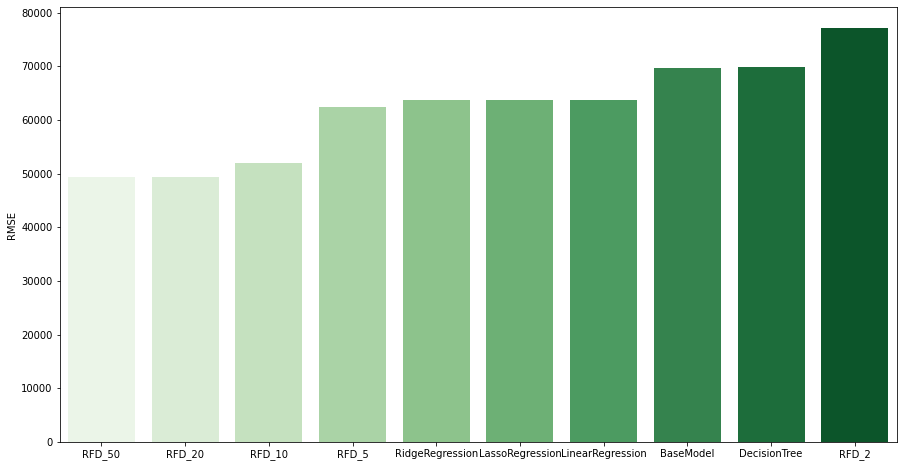

In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='RMSE',data=accuracy_model,ax=ax,palette='Greens')



In [ ]:
accuracy_model.sort_values(by=['Training_Accuracy'],inplace=True)

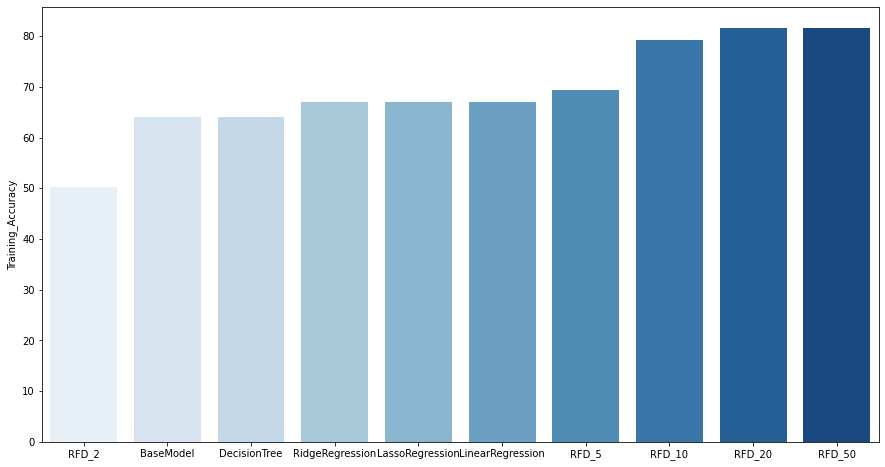

In [ ]:
fig1, ax1 = pyplot.subplots(figsize=(15,8))
sns.barplot(x=accuracy_model.index,y='Training_Accuracy',data=accuracy_model,ax=ax1,palette='Blues')